In [1]:
import pandas as pd
import numpy as np
import umap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

c:\Users\wrath\source\nasa-crawler\webvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('Downloads/processed.csv', encoding="utf8")
df.Paragraph = df.Paragraph.astype(str)
df

,URL,url_unique,Paragraph
0,https://llis.nasa.gov/lesson/0740.html,1,curator : michael bell nasa official : ed hoff...
1,https://llis.nasa.gov/lesson/1,2,prelaunch check shuttle orbiter ov-104 flight ...
2,https://llis.nasa.gov/lesson/1,2,recurrence control prevent original manufactur...
3,https://llis.nasa.gov/lesson/1,2,ensure process modification considered impleme...
4,https://llis.nasa.gov/lesson/10,3,shuttle orbiter general purpose computer ( gpc...
...,...,...,...
10918,https://llis.nasa.gov/lesson/998,1732,space shuttle program element contractor prese...
10919,https://llis.nasa.gov/lesson/999,1733,space shuttle safety operational upgrade
10920,https://llis.nasa.gov/lesson/999,1733,nasa plan operate space shuttle least 2012. re...
10921,https://llis.nasa.gov/lesson/999,1733,nasa complete space shuttle upgrade soon possi...


In [3]:
vectorizer = CountVectorizer()
vectorizer.fit(df["Paragraph"].tolist())

print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'curator': 4179, 'michael': 9275, 'bell': 2454, 'nasa': 9748, 'official': 10176, 'ed': 5294, 'hoffman': 7276, 'contact': 3833, 'llis': 8771, 'prelaunch': 11262, 'check': 3161, 'shuttle': 13457, 'orbiter': 10298, 'ov': 10412, '104': 141, 'flight': 6347, 'sts': 14195, '36': 787, 'ac2': 1331, 'bus': 2815, 'phase': 10840, 'voltage': 15918, 'fluctuated': 6387, '112': 176, '122v': 227, 'one': 10221, 'minute': 9384, 'inverter': 8120, 'supplying': 14377, 'removed': 12401, 'replaced': 12450, 'vendor': 15783, 'inspection': 7887, 'failed': 6080, 'found': 6539, 'loose': 8842, 'mounting': 9606, 'screw': 13138, 'electrical': 5383, 'internal': 8040, 'caused': 3012, 'fluctuation': 6389, 'identical': 7468, 'problem': 11396, 'previously': 11344, 'discovered': 4868, 'prompted': 11486, 'change': 3127, 'manufacturing': 9051, 'procedure': 11402, 'include': 7659, 'specified': 13820, 'torque': 14978, 'unit': 15483, 'reworked': 12738, 'procedural': 11400, 'incorporated': 7680, 'rework': 12737, 'p

In [4]:
vector = vectorizer.transform(df["Paragraph"].tolist())
print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
df_vector = pd.DataFrame(vector.toarray())

In [6]:
scaled_data = StandardScaler().fit_transform(df_vector)

In [8]:
reducer_2d = umap.UMAP(n_components=2)
embedding_2d = reducer_2d.fit_transform(scaled_data)
embedding_2d.shape

(10923, 2)

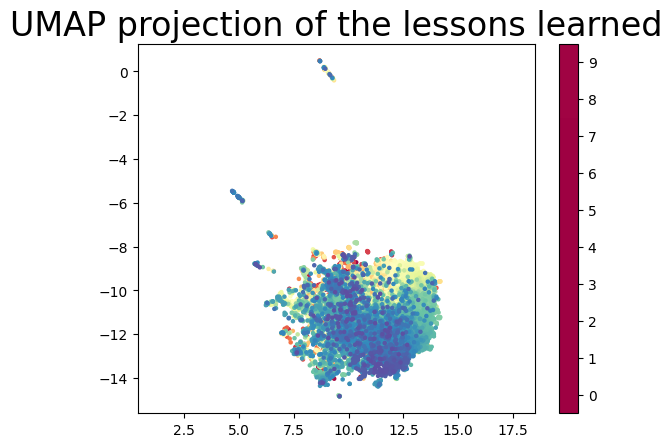

In [9]:
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df["url_unique"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the lessons learned', fontsize=24)

In [10]:
reducer_3d = umap.UMAP(n_components=3)
embedding_3d = reducer_3d.fit_transform(scaled_data)
embedding_3d.shape

(10923, 3)

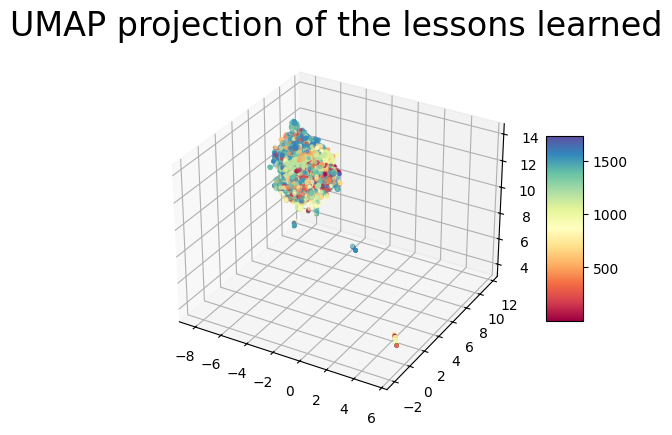

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=df["url_unique"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title('UMAP projection of the lessons learned', fontsize=24)
plt.show()